# Mushroom Clusters

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.cm as cm
%matplotlib inline

In [23]:
df = pd.read_csv('G:\Csvfiles\mushrooms.csv')

In [24]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
# Function to map categorical features to integral values
def Encoder(val):
    if val in category:
        return category[val]
    else:
        category[val]=len(category)
    return category[val]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [27]:
df.shape

(8124, 23)

In [28]:
# Apply the encoder
for i in range(df.shape[1]):
    category={}
    df.iloc[:,i]=df.iloc[:,i].apply(Encoder)

In [29]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [30]:
# Since we are doing clustering
X = df.drop('class',axis=1)

In [31]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1


In [37]:
# Converting all the features and extracting just 2 principle components for scatter plot analysis
pca = PCA(n_components=6).fit(X)

In [38]:
pca_2d = pca.transform(X)

In [42]:
pca_2d

array([[-7.61882645,  0.06682851, -2.14538755, -0.82844795, -0.81776856,
         1.77968518],
       [-6.16438895,  0.2154318 , -0.92615157, -0.36264195, -0.82867344,
         1.14072559],
       [-4.75063571, -0.43027715, -0.12260078,  0.06729388, -0.04992662,
         0.74519419],
       ...,
       [ 3.88424753,  8.22726895, -1.55405922,  2.09118671,  1.67935405,
         2.8523349 ],
       [ 5.53029188, -2.37526767, -2.10692842, -1.2872811 ,  1.55657609,
        -1.99514897],
       [ 8.45900211,  4.30019469, -3.38549213,  3.87443475, -2.55882058,
         3.82945853]])

In [39]:
pca.components_

array([[ 0.12721666, -0.0428798 ,  0.02158687,  0.06495561,  0.3102447 ,
         0.01269358, -0.03508399, -0.05656257,  0.63530146,  0.01780324,
         0.29228744,  0.09082233,  0.13300163,  0.2005691 ,  0.17551516,
         0.        ,  0.0186798 ,  0.00783977,  0.08883002,  0.38065428,
         0.18682322,  0.31940356],
       [-0.04633793,  0.0990536 , -0.12394756,  0.03051279, -0.09193691,
         0.02635313, -0.02365758,  0.09362426, -0.4346991 , -0.11506948,
        -0.09176535,  0.14625449,  0.21874188,  0.51286169,  0.56802792,
        -0.        ,  0.03905929,  0.007224  ,  0.15038633,  0.0768981 ,
         0.2345182 ,  0.05121254],
       [-0.02545103,  0.03913427,  0.93763343,  0.01964574,  0.16236769,
        -0.02113123,  0.00591755,  0.01853332, -0.18779902, -0.01699271,
         0.02135265,  0.08298527,  0.11558988, -0.01064388, -0.03400216,
         0.        , -0.03606947,  0.03398702,  0.09723854,  0.1087974 ,
         0.05375175, -0.08320028],
       [-0.04862115

In [40]:
pca.explained_variance_

array([13.5738675 ,  5.13608996,  3.11499148,  2.82357115,  2.35032796,
        1.57849055])

In [41]:
pca.explained_variance_ratio_

array([0.39386697, 0.14903167, 0.09038634, 0.08193033, 0.06819844,
       0.04580237])

In [16]:
# Elbow Method
# Building model
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

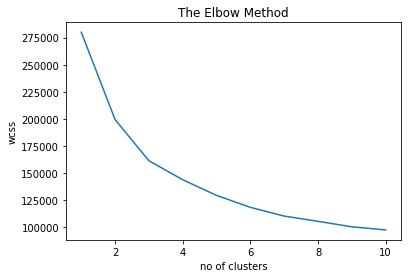

In [17]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

* Above observations suggest k=3 but since we already know that there are only two clusters here edible and poisonous mushrooms.

* the appropriate value for k should indeed be 2 (edible , posionous)

In [18]:
kmeans = KMeans(n_clusters=2, init= 'k-means++')

In [19]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
Ypreds = kmeans.predict(X)

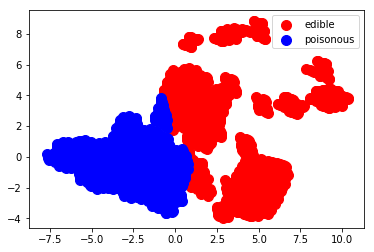

In [21]:
plt.scatter(pca_2d[Ypreds == 0, 0], pca_2d[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(pca_2d[Ypreds == 1, 0], pca_2d[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.legend()